First we import required libraries and get the space weather page.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime as dt
import re
import matplotlib.pyplot as plt 
import matplotlib as mp 

nasa_url = "https://cmsc320.github.io/files/waves_type2.html"
comp_url = "https://cmsc320.github.io/files/top-50-solar-flares.html"

# gets messy html, makes it clean, and stores it as page
comp_r = requests.get(comp_url, "html.parser")
comp_soup = BeautifulSoup(comp_r.content)
#print(comp_soup.prettify())

Unfortunately, we notice the table of interest has no ID. Luckily it's the first one, so we can easily find it and store as a table.

In [2]:
# finds first table which is the one we're looking for
comp_table = comp_soup.find("table")
#print(comp_table)

Now we use pandas to process the table. We read the table we got earlier into a data frame and display it below.

In [3]:
# gathers table in df
comp_df = pd.read_html(str(comp_table))[0] # returns a list of length 1, so we store only that element
#comp_df

We want to change the headers to something that makes more sense. This is easily done by setting df's columns to those we specify.

In [4]:
# tidys data
comp_columns = ["rank","x_classification","date","region",
               "start_time","maximum_time","end_time","movie"]
comp_df.columns = comp_columns
#comp_df

Now we want to tidy our data. We'll drop the last column first.

In [5]:
comp_df.drop(columns = "movie",inplace = True)
#comp_df

Here we combine the date and time columns into a separate datetime column for each time of interest recorded. Next, the date column is dropped and the columns are reordered into a more useful order.

In [6]:
# ymd for yyyy/mm/dd, hm for hh:mm
def ymd2dt(date,time):
    return dt.datetime.strptime(date+time,"%Y/%m/%d%H:%M")

comp_df['start_time'] = comp_df.apply(lambda row : ymd2dt(row.date,row.start_time), axis = 1)
comp_df['maximum_time'] = comp_df.apply(lambda row : ymd2dt(row.date,row.maximum_time), axis = 1)
comp_df['end_time'] = comp_df.apply(lambda row : ymd2dt(row.date,row.end_time), axis = 1)

comp_df.drop(columns = "date",inplace = True)
comp_order = ["rank","x_classification","start_time",
             "maximum_time","end_time","region"]
comp_df = comp_df[comp_order]
comp_df.replace("-",np.nan)
comp_df

,rank,x_classification,start_time,maximum_time,end_time,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


Now that we have our competitor's data nice and tidy, we must scrape NASA's data. First we'll display the html to find what we're looking for.

In [7]:
# gets messy html, makes it clean, and stores it as page
nasa_r = requests.get(nasa_url, "html.parser")
nasa_soup = BeautifulSoup(nasa_r.content)
#print(nasa_soup.prettify())

Next we extract each row of the table as a long string and store it in nasa_df_strings.

In [8]:
# saves the rest of every line that starts with a properly formatted date
# *this might not work if a date is missing or they add a date formatted in
# this way to the paragraph. This seems more robust than simply chopping
# off the first N and last M lines to isolate the data, as these numbers are
# more likely to be changed than a random date in specific added outside the
# table. Additionally, it is unlikely that a date would be logged as missing.
nasa_lines = re.findall(r"\d{4}/\d{2}/\d{2}.+",nasa_soup.get_text())

nasa_df_strings = pd.DataFrame(nasa_lines)
#nasa_df_strings

Now we convert the strings to a dataframe with the columns named accordingly.

In [9]:
def split_row(row):
    line = row.iloc[0]
    new_line = re.sub(r" +"," ",line) # removes extra whitespace
    # splits line into columns and keeps the first 15 columns which are the
    new_line = new_line.split(" ",15)
    if len(new_line) < 16 :
        new_line.append('')
    return new_line

def to_int(value):
    return int(value) if str(value).isnumeric() else value

nasa_columns = ["start_date","start_time","end_date","end_time","start_freq",
               "end_freq","flare_location","flare_region","flare_classification",
                "cme_date","cme_time","cme_angle","cme_width","cme_speed",
                "plot","comments"]

nasa_df = nasa_df_strings.apply(lambda row: split_row(row), axis=1, result_type='expand')
nasa_df.columns = nasa_columns
nasa_df = nasa_df.drop("comments",axis=1)
nasa_df = nasa_df.applymap(lambda value: to_int(value))

#nasa_df

We will replace all missing values with np.nan. We will also add a new column to record whether a flare was a halo flare and replace "Halo" in cme_angle with pd.NA. If a width is a lower bound, we will record this in a new column and keep only the digits from cme_width. Finally, we'll combine dates and times into datetime objects. I account for the rare case where a flare starts in one year and ends in the next.

In [10]:
def is_halo(value) :
    return str(value) == "Halo"

def is_lower_bound(value) :
    return True if len(re.findall(r"\>",str(value))) > 0 else False

def to_numeric(value):
    numeric_str = re.findall(r"\d+",str(value))
    return int(numeric_str[0]) if len(numeric_str) > 0 else value

# start_date must come before date and time
def md2dt(date1,date2,time2):
    if (str(date1) == str(np.nan) or str(date2) == str(np.nan) or str(time2) == str(np.nan)) :
        return np.nan
    date1_dt = dt.datetime.strptime(date1,"%Y/%m/%d")
    date2_year = date1_dt.year
    date2_dt = dt.datetime.strptime(str(date2_year)+date2,"%Y%m/%d")
    if date1_dt > date2_dt :
        date2_year += 1
    if time2 == "24:00" :
        time2 = "00:00"
    return dt.datetime.strptime(str(date2_year)+date2+time2,"%Y%m/%d%H:%M")
    
nasa_df.replace("-----",np.nan,inplace = True)
nasa_df.replace("----",np.nan,inplace = True)
nasa_df.replace("--/--",np.nan,inplace = True)
nasa_df.replace("--:--",np.nan,inplace = True)
nasa_df.replace("????",np.nan,inplace = True)

nasa_df["is_halo"] = nasa_df.loc[:,"cme_angle"].apply(lambda value: is_halo(value))
nasa_df.replace("Halo",pd.NA,inplace = True)
nasa_df["width_lower_bound"] = nasa_df.loc[:,"cme_width"].apply(lambda value: is_lower_bound(value))
nasa_df["cme_width"] = nasa_df.loc[:,"cme_width"].apply(lambda value: to_numeric(value))
nasa_df["start_datetime"] = nasa_df.apply(lambda row: ymd2dt(row.start_date,row.start_time),axis=1)
nasa_df["end_datetime"] = nasa_df.apply(lambda row: md2dt(row.start_date,row.end_date,row.end_time),axis=1)
nasa_df["cme_datetime"] = nasa_df.apply(lambda row: md2dt(row.start_date,row.cme_date,row.cme_time),axis=1)
nasa_df.drop(["start_date","start_time","end_date","end_time","cme_date","cme_time"],axis = 1,inplace = True)
nasa_df = nasa_df[["start_datetime","end_datetime","start_freq",
               "end_freq","flare_location","flare_region",
               "flare_classification","cme_datetime","cme_angle","cme_width",
               "cme_speed","plot","is_halo","width_lower_bound"]]
nasa_df

,start_datetime,end_datetime,start_freq,end_freq,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,4000.0,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312.0,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,1000.0,S28E19,8027,C6.8,1997-04-07 14:27:00,<NA>,360,878.0,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,80.0,N21W08,8038,C1.3,1997-05-12 05:30:00,<NA>,360,464.0,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,500.0,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296.0,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,2000.0,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712.0,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000.0,210.0,S10W12,12673,M5.5,2017-09-04 20:12:00,<NA>,360,1418.0,PHTX,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000.0,70.0,S08W33,12673,X9.3,2017-09-06 12:24:00,<NA>,360,1571.0,PHTX,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000.0,150.0,S09W92,NaN,X8.3,2017-09-10 16:00:00,<NA>,360,3163.0,PHTX,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000.0,13000.0,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252.0,PHTX,False,False


Replication:

I hashed the solar flare classifications to a number as described below to get the ording of the solar flares. My data looks similar to the space weather website, but it seems they get their data from a more than just the NASA source because they have flares I can't find on the mirrored NASA website.

In [11]:
# hashes classification "AB.C" to AABBC where A is the number of letter 'A' in
# the alphabet (1-26) regardless of case, 'B' is a number between 0-99, and
# 'C' is a number between 0-9
def class_hash(classification) :
    classification = str(classification)
    c_values = re.findall(r"\d+",classification)
    if (len(c_values) <= 0) :
        value = -1
    if (len(c_values) > 0) :
        value = int(ord(classification.upper()[0])-ord("A")+1)*1000
        value += int(c_values[0])*10
    if(len(c_values) > 1) :
        value += int(c_values[1])
    return value

nasa_df_flare_classification_value = nasa_df.loc[:,["flare_classification"]]
nasa_df_flare_classification_value.columns = ["flare_classification_value"]
nasa_df_flare_classification_value=nasa_df_flare_classification_value.applymap(lambda x: class_hash(x))
nasa_df = pd.merge(nasa_df,nasa_df_flare_classification_value,left_index=True, right_index=True)
nasa_50 = nasa_df.nlargest(50,"flare_classification_value")
nasa_50
#nasa_df

,start_datetime,end_datetime,start_freq,end_freq,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound,flare_classification_value
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000.0,200.0,S19W83,10486,X28.,2003-11-04 19:54:00,<NA>,360,2657.0,PHTX,True,False,24280
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000.0,250.0,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505.0,PHTX,False,False,24200
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000.0,40.0,S16E08,10486,X17.,2003-10-28 11:30:00,<NA>,360,2459.0,PHTX,True,False,24170
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000.0,40.0,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199.0,PHTX,False,False,24140
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000.0,500.0,S15W02,10486,X10.,2003-10-29 20:54:00,<NA>,360,2029.0,PHTX,True,False,24100
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100,X9.4,1997-11-06 12:10:00,<NA>,360,1556.0,PHTX,True,False,24094
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000.0,70.0,S08W33,12673,X9.3,2017-09-06 12:24:00,<NA>,360,1571.0,PHTX,True,False,24093
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000.0,250.0,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False,24090
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000.0,250.0,S14W56,10486,X8.3,2003-11-02 17:30:00,<NA>,360,2598.0,PHTX,True,False,24083
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000.0,150.0,S09W92,NaN,X8.3,2017-09-10 16:00:00,<NA>,360,3163.0,PHTX,True,False,24083


Integration:

The competitor comparison (comp_comp) dataframe shows the nasa flare with the closest matching flare_classification value out of the flares with the top 5 closest matching average time deltas between the three recorded times (start, max/cme, end). This has excellent agreement with most of the space weather data. However, it is apparent that the space weather website has additional data not found on the NASA website mirror. I can say this confidently because for some flares, the closest NASA data is weeks away from the space weather data. They are also in different regions and at different strengths, so it is reasonable to conclude that space weather is using some additional data.

In [12]:
nasa_comp = nasa_df[["start_datetime","cme_datetime","end_datetime","flare_region","flare_classification","flare_classification_value"]]
nasa_comp.columns = ["start_datetime","max_datetime","end_datetime","region","flare_classification","flare_classification_value",]
comp_comp = comp_df[["rank","start_time","maximum_time","end_time","region","x_classification"]]
comp_comp.columns = ["rank","start_datetime","max_datetime","end_datetime","region","flare_classification"]
comp_flare_classification_value = comp_comp.loc[:,["flare_classification"]]
comp_flare_classification_value = comp_flare_classification_value.applymap(lambda x: class_hash(x))
comp_comp["flare_classification_value"] = comp_flare_classification_value.loc[:,["flare_classification"]]

closest_index_list = []

# for each of the top competitors' flares compile list of how close
for row_c in comp_comp.itertuples():
    header = ["start_del","max_del","end_del"]
    start_c = row_c.start_datetime
    max_c = row_c.max_datetime
    end_c = row_c.end_datetime
    temp_dict_list = []
#     del_df = pd.DataFrame(0,index = np.arange(len(nasa_comp.index)), columns = columns)
    for row_n in nasa_comp.itertuples():
        start_n = row_n.start_datetime
        max_n = row_n.max_datetime
        end_n = row_n.end_datetime
        start_del = start_n-start_c if pd.isnull(start_n-start_c) else abs(start_n-start_c)
        max_del = max_n-max_c if pd.isnull(max_n-max_c) else abs(max_n-max_c)
        end_del = end_n-end_c if pd.isnull(end_n-end_c) else abs(end_n-end_c)
        temp_dict_list.append({"start_del": start_del,"max_del" : max_del,"end_del" : end_del,"flare_classification_value" : row_n.flare_classification_value})
    del_df = pd.DataFrame.from_dict(temp_dict_list)
    del_df["mean_time_delta"] = del_df[["start_del","max_del","end_del"]].mean(axis=1)
    del_df = del_df.sort_values("mean_time_delta")
    del_df = del_df.iloc[(del_df["mean_time_delta"]).abs().argsort()[0:4]]
    del_df = del_df.iloc[(del_df["flare_classification_value"]-row_c.flare_classification_value).abs().argsort()]
    closest_index_list.append(del_df.index[0])
closest_flare_df = pd.DataFrame(closest_index_list, columns = ["closest_nasa_flare_index"])
comp_comp = pd.merge(comp_comp,closest_flare_df,left_index=True, right_index=True)
comp_comp = comp_comp.join(nasa_comp,on="closest_nasa_flare_index",lsuffix="_c",rsuffix="_n") 
comp_comp["flare_classification_value_diff"] = comp_comp["flare_classification_value_c"].sub(comp_comp["flare_classification_value_n"],axis=0)
comp_comp["start_datetime_diff"] = comp_comp["start_datetime_c"].sub(comp_comp["start_datetime_n"],axis=0)
comp_comp["max_datetime_diff"] = comp_comp["max_datetime_c"].sub(comp_comp["max_datetime_n"],axis=0)
comp_comp["end_datetime_diff"] = comp_comp["end_datetime_c"].sub(comp_comp["end_datetime_n"],axis=0)
comp_comp["mean_time_diff"] = comp_comp[["start_datetime_diff","max_datetime_diff","end_datetime_diff"]].mean(axis=1)
comp_comp["region_diff"] = comp_comp["region_c"].sub(comp_comp["region_n"],axis=0)

comp_comp

<ipython-input-12-2e8e3afce369>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_comp["flare_classification_value"] = comp_flare_classification_value.loc[:,["flare_classification"]]


,rank,start_datetime_c,max_datetime_c,end_datetime_c,region_c,flare_classification_c,flare_classification_value_c,closest_nasa_flare_index,start_datetime_n,max_datetime_n,end_datetime_n,region_n,flare_classification_n,flare_classification_value_n,flare_classification_value_diff,start_datetime_diff,max_datetime_diff,end_datetime_diff,mean_time_diff,region_diff
0,1,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486,X28+,24280,240,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-04 00:00:00,10486,X28.,24280,0,-1 days +23:29:00,-1 days +23:59:00,0 days 20:06:00,0 days 06:31:20,-10000
1,2,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393,X20+,24200,117,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00,9393,X20.,24200,0,-1 days +23:27:00,-1 days +23:45:00,-1 days +19:33:00,-1 days +22:15:00,0
2,3,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486,X17.2+,24172,233,2003-10-28 11:10:00,2003-10-28 11:30:00,2003-10-29 00:00:00,10486,X17.,24170,2,-1 days +22:41:00,-1 days +23:40:00,-1 days +11:24:00,-1 days +19:15:00,-10000
3,4,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808,X17+,24170,317,2005-09-09 19:45:00,2005-09-09 19:48:00,2005-09-09 22:00:00,10808,X6.2,24062,108,-3 days +21:32:00,-3 days +21:52:00,-3 days +20:03:00,-3 days +21:09:00,-10000
4,5,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415,X14.4,24144,126,2001-04-15 14:05:00,2001-04-15 14:06:00,2001-04-16 13:00:00,9415,X14.,24140,4,-1 days +23:14:00,-1 days +23:44:00,-1 days +00:55:00,-1 days +15:57:40,0
5,6,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486,X10,24100,234,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-29 00:00:00,10486,X10.,24100,0,-1 days +23:42:00,-1 days +23:55:00,0 days 21:01:00,0 days 06:52:40,-10000
6,7,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100,X9.4,24094,8,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,8100,X9.4,24094,0,-1 days +23:29:00,-1 days +23:45:00,-1 days +03:31:00,-1 days +16:55:00,0
7,8,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673,X9.3,24093,514,2017-09-06 12:05:00,2017-09-06 12:24:00,2017-09-07 08:00:00,12673,X9.3,24093,0,-1 days +23:48:00,-1 days +23:38:00,-1 days +04:10:00,-1 days +17:12:00,-10000
8,9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930,X9,24090,328,2006-12-05 10:50:00,NaT,2006-12-05 20:00:00,10930,X9.0,24090,0,-1 days +23:28:00,NaT,-1 days +14:45:00,-1 days +19:06:30,-10000
9,10,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486,X8.3,24083,237,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,10486,X8.3,24083,0,-1 days +23:33:00,-1 days +23:55:00,-1 days +16:39:00,-1 days +21:22:20,-10000


Here I add the rank of the best matching NASA data to the NASA table. 

In [13]:
ranks = comp_comp[["rank"]]
ranks.index = comp_comp["closest_nasa_flare_index"]
nasa_df = nasa_df.join(ranks)
nasa_df

,start_datetime,end_datetime,start_freq,end_freq,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound,flare_classification_value,rank
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,4000.0,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312.0,PHTX,False,False,13013,NaN
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,1000.0,S28E19,8027,C6.8,1997-04-07 14:27:00,<NA>,360,878.0,PHTX,True,False,3068,NaN
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,80.0,N21W08,8038,C1.3,1997-05-12 05:30:00,<NA>,360,464.0,PHTX,True,False,3013,NaN
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,500.0,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296.0,PHTX,False,False,13013,NaN
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,2000.0,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712.0,PHTX,False,False,3014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000.0,210.0,S10W12,12673,M5.5,2017-09-04 20:12:00,<NA>,360,1418.0,PHTX,True,False,13055,NaN
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000.0,70.0,S08W33,12673,X9.3,2017-09-06 12:24:00,<NA>,360,1571.0,PHTX,True,False,24093,8.0
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000.0,150.0,S09W92,NaN,X8.3,2017-09-10 16:00:00,<NA>,360,3163.0,PHTX,True,False,24083,11.0
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000.0,13000.0,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252.0,PHTX,False,False,3030,NaN


Analysis

Now we want to see the top 50 flares in the context of time and cme_speed. The plot is shown below. The top 50 flares are highlighted in red and have their rank displayed. There does seem to be a relation between cme speed and whether it falls on the top 50 list, since the average top 50 flare tends to be faster than the average flare. This is not an extremely strong relation, as some regular flares are faster than other top 50 flares.

<Figure size 3200x3200 with 0 Axes>

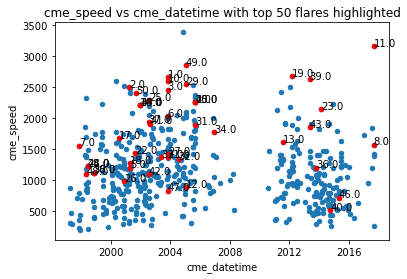

<Figure size 3200x3200 with 0 Axes>

In [14]:
nasa_top50 = nasa_df.dropna(subset=["rank","cme_datetime","cme_speed"])
nasa_df_plot = nasa_df.dropna(subset=["cme_datetime","cme_speed"])
fid, ax = plt.subplots()
nasa_df_plot.plot(x="cme_datetime",y="cme_speed",kind="scatter",ax=ax)
nasa_top50.plot(x="cme_datetime",y="cme_speed",kind="scatter",ax=ax,c="r")
plt.locator_params(axis = "y",nbins = 10)
for row in nasa_top50.itertuples() :
    ax.annotate(row.rank,(row.cme_datetime,row.cme_speed))
plt.title("cme_speed vs cme_datetime with top 50 flares highlighted")
plt.figure(figsize=(40, 40), dpi=80)
